In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
exclude = [
        'Diamond Princess',
        'Grand Princess',
        'American Samoa',
        'Virgin Islands',
        'Northern Mariana Islands',
        'Puerto Rico',
    ]

In [3]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    114067979.0
Deaths         2530716.0
Recovered     64418462.0
Active        47118031.0
dtype: float64

In [4]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,28605669,513091,0,28092578.0
Brazil,10551259,254942,9382316,914001.0
Mexico,2086938,185715,1633900,267323.0
India,11112241,157157,10786452,168632.0
United Kingdom,4188827,123083,11643,4054101.0
...,...,...,...,...
Solomon Islands,18,0,14,4.0
Marshall Islands,4,0,4,0.0
Samoa,3,0,2,1.0


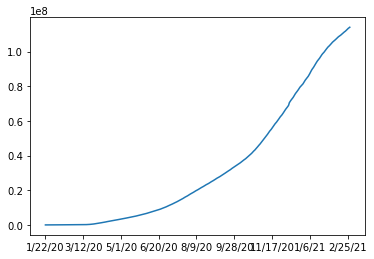

In [5]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

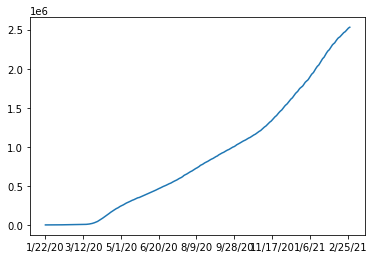

In [6]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

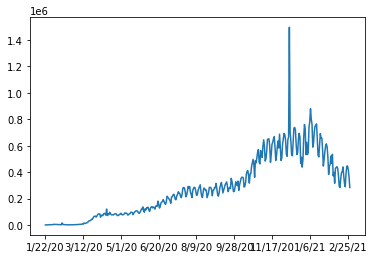

In [7]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

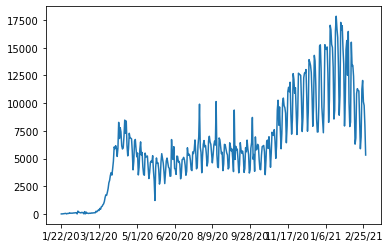

In [8]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

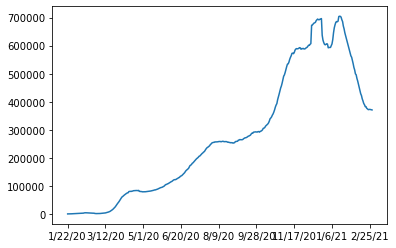

In [9]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

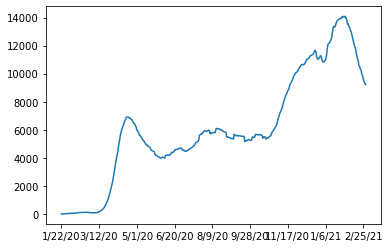

In [10]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [11]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,28006110,28077620,28134115,28190159,28261595,28336097,28413388,28490179,28554465,28605669
India,0,0,0,0,0,0,0,0,1,1,...,10977387,10991651,11005850,11016434,11030176,11046914,11063491,11079979,11096731,11112241
Brazil,0,0,0,0,0,0,0,0,0,0,...,10084208,10139148,10168174,10195160,10257875,10324463,10390461,10455630,10517232,10551259
Russia,0,0,0,0,0,0,0,0,0,2,...,4092649,4105424,4117992,4130447,4142126,4153735,4164802,4175757,4187166,4198400
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,4107290,4117743,4127578,4138237,4146760,4156707,4166727,4175315,4182772,4188827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Marshall Islands,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
Samoa,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3


In [12]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,495933,497757,499009,500334,502679,505902,508313,510458,511994,513091
Brazil,0,0,0,0,0,0,0,0,0,0,...,244737,245977,246504,247143,248529,249957,251498,252835,254221,254942
Mexico,0,0,0,0,0,0,0,0,0,0,...,178965,179797,180107,180536,181809,182815,183692,184474,185257,185715
India,0,0,0,0,0,0,0,0,0,0,...,156212,156302,156385,156463,156567,156705,156825,156938,157051,157157
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,120147,120593,120810,120988,121536,121979,122303,122648,122939,123083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Timor-Leste,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Micronesia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Holy See,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,...,106355.0,71510.0,56495.0,56044.0,71436.0,74502.0,77291.0,76791.0,64286.0,51204.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53582.0,54940.0,29026.0,26986.0,62715.0,66588.0,65998.0,65169.0,61602.0,34027.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,15470.0,14914.0,13450.0,9617.0,13299.0,16402.0,19871.0,20488.0,18902.0,17440.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,13993.0,14264.0,14199.0,10584.0,13742.0,16738.0,16577.0,16488.0,16752.0,15510.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,13242.0,12775.0,12568.0,12455.0,11679.0,11609.0,11067.0,10955.0,11409.0,11234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Brazzaville),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,206.0,0.0,0.0,195.0,0.0,0.0,0.0,0.0
Comoros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,17.0,12.0,16.0,4.0,17.0,13.0,6.0,13.0,0.0
Solomon Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
global_new_confirmed_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.333333,0.25,0.8,0.666667,0.571429,0.714286,0.714286,0.857143,...,73405.285714,71194.714286,69986.000000,70281.285714,71562.142857,72229.714286,73376.142857,69152.714286,68120.714286,67364.857143
Brazil,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,45536.142857,47056.285714,47665.857143,46921.428571,47984.857143,49388.000000,51405.000000,53060.285714,54012.000000,54726.428571
Italy,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,...,11940.857143,12139.571429,12481.000000,12805.714286,13224.428571,13843.857143,14717.571429,15434.428571,16004.142857,16574.142857
India,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.142857,0.142857,...,12091.571429,12387.285714,12751.571429,12960.571429,13265.142857,13816.142857,14299.571429,14656.000000,15011.428571,15198.714286
Russia,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,...,13535.857143,13269.428571,13069.428571,12848.857143,12655.857143,12510.142857,12199.285714,11872.571429,11677.428571,11486.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Brazzaville),0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,29.428571,29.428571,29.428571,57.285714,57.285714,57.285714,57.285714,27.857143
Comoros,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.142857,22.571429,24.000000,22.857143,18.428571,18.000000,13.428571,12.142857,11.571429,9.857143
Solomon Islands,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2686.0,1824.0,1252.0,1325.0,2345.0,3223.0,2411.0,2145.0,1536.0,1097.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1280.0,1240.0,527.0,639.0,1386.0,1428.0,1541.0,1337.0,1386.0,721.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,857.0,832.0,310.0,429.0,1273.0,1006.0,877.0,782.0,783.0,458.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,461.0,469.0,409.0,329.0,411.0,378.0,437.0,419.0,430.0,370.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,348.0,251.0,232.0,274.0,356.0,318.0,308.0,253.0,280.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,572.0,157.0,159.0,334.0,431.0,278.0,261.0,4.0,3.0,0.0


In [16]:
global_new_deaths_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1890.857143,1841.857143,1863.714286,1922.571429,2015.000000,2136.428571,2152.285714,2075.000000,2033.857143,2011.714286
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1035.428571,1063.571429,1037.000000,1052.857143,1084.142857,1123.857143,1148.714286,1156.857143,1177.714286,1205.428571
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,915.428571,860.857143,842.857143,839.857143,831.857143,822.000000,797.714286,787.000000,780.000000,801.142857
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,448.142857,444.857143,443.000000,435.000000,429.571429,418.000000,413.428571,407.428571,401.857143,396.285714
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,312.857143,304.285714,305.857143,308.142857,311.000000,303.714286,298.142857,284.571429,288.714286,283.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gabon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.285714,0.285714,0.142857,0.142857,0.714286,0.714286,1.142857,1.142857,1.142857
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,359.714286,353.714286,352.571429,341.428571,319.142857,314.571429,313.142857,232.000000,210.000000,187.285714


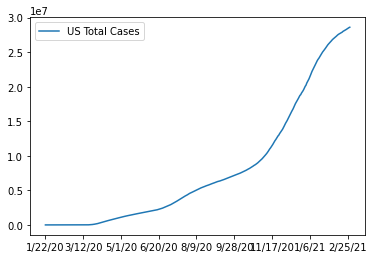

In [17]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

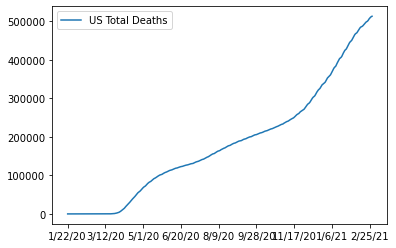

In [18]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

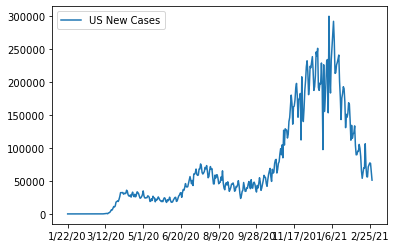

In [19]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

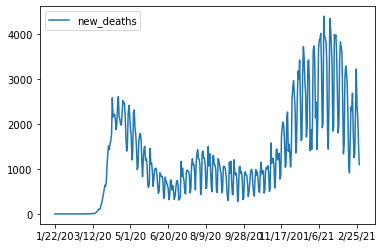

In [20]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
New York,7827
Florida,5539
Texas,3650
California,3336
Arkansas,3220
New Jersey,2389
Georgia,2334
South Carolina,1751
Virginia,1736


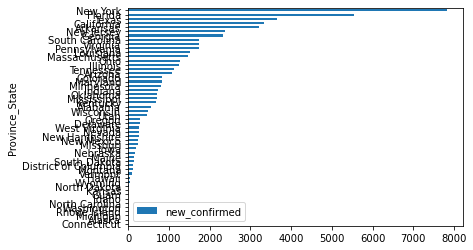

In [21]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
California,205
Texas,178
Virginia,170
Florida,118
New York,117
Pennsylvania,72
Ohio,60
Massachusetts,51
Oklahoma,49


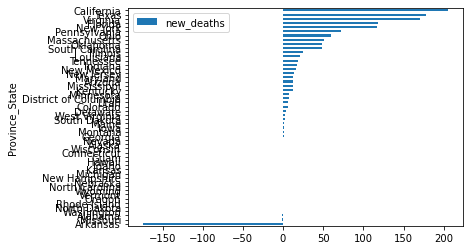

In [22]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

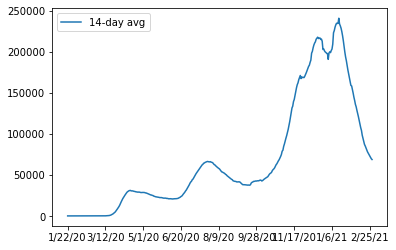

In [23]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

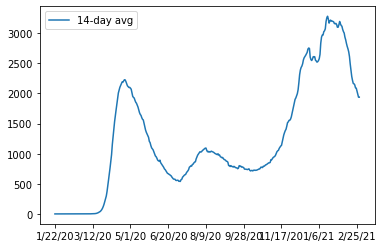

In [24]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [25]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,485212,485986,486843,487520,488973,490220,491110,491849,492683,493252
Alaska,0,0,0,0,0,0,0,0,0,0,...,57393,57393,57393,57738,57793,57970,58151,58263,58263,58263
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,804116,806163,807967,809474,810658,811968,812907,814528,815707,816782
Arkansas,0,0,0,0,0,0,0,0,0,0,...,314713,315230,315514,315759,316593,317396,318122,318638,319195,322415
California,0,0,0,0,2,2,2,2,2,3,...,3521225,3527338,3531846,3536946,3543340,3549090,3554629,3559311,3563578,3566914
Colorado,0,0,0,0,0,0,0,0,0,0,...,418695,419812,420614,421294,422390,423558,424677,426198,427462,428303
Connecticut,0,0,0,0,0,0,0,0,0,0,...,273101,273101,273101,275334,276691,278184,279159,279946,279946,279946
Delaware,0,0,0,0,0,0,0,0,0,0,...,84181,84531,84732,85090,85228,85506,85801,86098,86517,86799


In [26]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,9573,9590,9592,9592,9660,9744,9831,9869,9930,9929
Alaska,0,0,0,0,0,0,0,0,0,0,...,289,289,289,290,290,290,290,290,290,290
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,15421,15480,15505,15502,15650,15693,15814,15897,15967,15980
Arkansas,0,0,0,0,0,0,0,0,0,0,...,5336,5348,5357,5363,5377,5387,5397,5407,5417,5243
California,0,0,0,0,0,0,0,0,0,0,...,48836,49120,49345,49541,49888,50972,51395,51794,51953,52158
Colorado,0,0,0,0,0,0,0,0,0,0,...,5878,5887,5892,5893,5907,5917,5925,5940,5945,5951
Connecticut,0,0,0,0,0,0,0,0,0,0,...,7523,7523,7523,7562,7572,7595,7614,7622,7622,7622
Delaware,0,0,0,0,0,0,0,0,0,0,...,1366,1366,1367,1368,1379,1402,1406,1418,1418,1422


In [27]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,847.0,774.0,857.0,677.0,1453.0,1247.0,890.0,739.0,834.0,569.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,211.0,0.0,0.0,345.0,55.0,177.0,181.0,112.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1918.0,2047.0,1804.0,1507.0,1184.0,1310.0,939.0,1621.0,1179.0,1075.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,268.0,517.0,284.0,245.0,834.0,803.0,726.0,516.0,557.0,3220.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,9137.0,6113.0,4508.0,5100.0,6394.0,5750.0,5539.0,4682.0,4267.0,3336.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1280.0,1117.0,802.0,680.0,1096.0,1168.0,1119.0,1521.0,1264.0,841.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1198.0,0.0,0.0,2233.0,1357.0,1493.0,975.0,787.0,0.0,0.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,329.0,350.0,201.0,358.0,138.0,278.0,295.0,297.0,419.0,282.0


In [28]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.0,17.0,2.0,0.0,68.0,84.0,87.0,38.0,61.0,-1.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,59.0,25.0,-3.0,148.0,43.0,121.0,83.0,70.0,13.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,12.0,9.0,6.0,14.0,10.0,10.0,10.0,10.0,-174.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,577.0,284.0,225.0,196.0,347.0,1084.0,423.0,399.0,159.0,205.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,9.0,5.0,1.0,14.0,10.0,8.0,15.0,5.0,6.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,39.0,10.0,23.0,19.0,8.0,0.0,0.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,11.0,23.0,4.0,12.0,0.0,4.0
